<a href="https://colab.research.google.com/github/bintang170802/projects/blob/main/ScriptCodingSkripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan**

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.2 MB/s eta 0:00:00


In [2]:
# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Impor packages
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Clustering:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
import skfuzzy as fuzz

# Visualisasi t-SNE:
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

# **Import dan informasi data**

In [4]:
# Impor data
data = pd.read_excel('drive/MyDrive/filedata/data_all_new.xlsx', 'Sheet1', engine='openpyxl')
data

,puskesmas,tahun,X1,X2,X3,X4,X5,bayi_asi_eksklusif,bayi,pus_miskin,pus,kk_air_minum_layak,kk
0,Nglipar I,2020,2.60,22.73,84.42,12.668919,80.25,11,154,1665,2375,4173,4842
1,Nglipar II,2020,7.62,16.19,73.33,14.155844,82.48,5,210,1567,2220,5303,6327
2,Gedangsari I,2020,13.59,29.13,86.41,23.094170,86.36,61,206,2191,2759,5535,6898
3,Gedangsari II,2020,5.44,13.61,41.50,20.675537,43.15,119,294,2271,2557,4891,7031
4,Patuk I,2020,7.80,14.15,81.95,14.511041,81.12,68,205,1261,2930,5272,6107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Karangmojo II,2022,10.05,19.60,85.94,24.521531,93.18,0,199,2100,4002,7630,8669
86,Semin I,2022,5.63,9.15,83.74,12.666200,78.93,0,284,1872,4105,9832,11051
87,Semin II,2022,6.67,11.56,74.56,10.062893,82.23,0,225,1617,3227,7687,8880
88,Playen I,2022,4.47,3.83,65.84,15.669206,73.95,0,313,2820,4559,10957,11782


In [5]:
# Dimensi dari dataset
data.shape

(90, 13)

In [6]:
# Tipe data setiap kolom dan variabel
data.dtypes

,0
puskesmas,object
tahun,int64
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
bayi_asi_eksklusif,int64
bayi,int64
pus_miskin,int64


In [7]:
# Statistik tiap variabel
data.describe(include='all').T.drop(columns=['unique', 'top', 'freq'])

,count,mean,std,min,25%,50%,75%,max
puskesmas,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,90.0,2021.0,0.821071,2020.0,2020.0,2021.0,2022.0,2022.0
X1,90.0,7.226778,2.891411,2.23,5.2675,7.07,9.105,13.59
X2,90.0,16.241,8.553848,1.15,9.16,15.1,24.095,32.97
X3,90.0,87.437,13.643052,33.46,82.7175,90.495,97.915,100.0
X4,90.0,16.411238,4.527433,3.021148,13.617336,16.782965,19.051036,28.475336
X5,90.0,82.006778,14.891719,34.31,76.155,83.985,92.2125,100.0
bayi_asi_eksklusif,90.0,61.044444,80.444539,0.0,0.0,11.5,109.0,307.0
bayi,90.0,237.033333,82.434782,80.0,174.75,223.0,293.0,421.0
pus_miskin,90.0,2161.555556,878.601981,209.0,1588.0,2100.0,2710.25,5096.0


In [8]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   puskesmas           90 non-null     object 
 1   tahun               90 non-null     int64  
 2   X1                  90 non-null     float64
 3   X2                  90 non-null     float64
 4   X3                  90 non-null     float64
 5   X4                  90 non-null     float64
 6   X5                  90 non-null     float64
 7   bayi_asi_eksklusif  90 non-null     int64  
 8   bayi                90 non-null     int64  
 9   pus_miskin          90 non-null     int64  
 10  pus                 90 non-null     int64  
 11  kk_air_minum_layak  90 non-null     int64  
 12  kk                  90 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 9.3+ KB


In [9]:
# Cek duplikat
any(data.duplicated())

False

In [10]:
# Cek nilai yang hilang
data.isna().sum()

,0
puskesmas,0
tahun,0
X1,0
X2,0
X3,0
X4,0
X5,0
bayi_asi_eksklusif,0
bayi,0
pus_miskin,0


# **Penetapan indeks dan modifikasi variabel**

In [11]:
# Puskesmas dan tahun menjadi index dari dataset
data.set_index(['puskesmas', 'tahun'], inplace=True)

In [12]:
# Modifikasi variabel
data['X6'] = (data['bayi_asi_eksklusif']*100) / data['bayi']
data['X7'] = (data['pus_miskin']*100) / data['pus']
data['X8'] = (data['kk_air_minum_layak']*100) / data['kk']
data.drop(columns=['bayi_asi_eksklusif', 'bayi', 'pus_miskin', 'pus', 'kk_air_minum_layak', 'kk'], inplace=True)

In [13]:
data

,,X1,X2,X3,X4,X5,X6,X7,X8
puskesmas,tahun,,,,,,,,
Nglipar I,2020,2.60,22.73,84.42,12.668919,80.25,7.142857,70.105263,86.183395
Nglipar II,2020,7.62,16.19,73.33,14.155844,82.48,2.380952,70.585586,83.815394
Gedangsari I,2020,13.59,29.13,86.41,23.094170,86.36,29.611650,79.412831,80.240649
Gedangsari II,2020,5.44,13.61,41.50,20.675537,43.15,40.476190,88.815018,69.563362
Patuk I,2020,7.80,14.15,81.95,14.511041,81.12,33.170732,43.037543,86.327166
...,...,...,...,...,...,...,...,...,...
Karangmojo II,2022,10.05,19.60,85.94,24.521531,93.18,0.000000,52.473763,88.014765
Semin I,2022,5.63,9.15,83.74,12.666200,78.93,0.000000,45.602923,88.969324
Semin II,2022,6.67,11.56,74.56,10.062893,82.23,0.000000,50.108460,86.565315


In [14]:
# Statistik tiap variabel
data.describe(include='all').T.drop(columns=['25%', '50%', '75%'])

,count,mean,std,min,max
X1,90.0,7.226778,2.891411,2.230000,13.590000
X2,90.0,16.241000,8.553848,1.150000,32.970000
X3,90.0,87.437000,13.643052,33.460000,100.000000
X4,90.0,16.411238,4.527433,3.021148,28.475336
X5,90.0,82.006778,14.891719,34.310000,100.000000
X6,90.0,30.788651,38.069184,0.000000,100.000000
X7,90.0,60.270495,18.006812,11.439518,100.000000
X8,90.0,85.584272,6.051432,65.973478,95.639459


# **Pengecekan dataset**

In [15]:
# Cek korelasi X1 dan X2
n = len(data)
sum_X1 = data['X1'].sum()
sum_X2 = data['X2'].sum()
cek_kor = pd.DataFrame()
cek_kor['X1_kuadrat'] = data['X1'].apply(lambda x: x**2)
cek_kor['X2_kuadrat'] = data['X2'].apply(lambda x: x**2)
cek_kor['X1_X2'] = data['X1'] * data['X2']
sum_X1_kuadrat = cek_kor['X1_kuadrat'].sum()
sum_X2_kuadrat = cek_kor['X2_kuadrat'].sum()
sum_X1_X2 = cek_kor['X1_X2'].sum()
r=(n*sum_X1_X2-sum_X1*sum_X2)/math.sqrt((n*sum_X1_kuadrat-sum_X1**2)*(n*sum_X2_kuadrat-sum_X2**2))

print('Jumlah Objek = ', n)
print('Jumlah X1 = ', sum_X1)
print('Jumlah X2 = ', sum_X2)
print('Jumlah X1^2 = ', sum_X1_kuadrat)
print('Jumlah X2^2 = ', sum_X2_kuadrat)
print('Jumlah X1*X2 = ', sum_X1_X2)
print('Koefisien korelasi X1 dan X2 = ', r)

Jumlah Objek =  90
Jumlah X1 =  650.41
Jumlah X2 =  1461.6899999999998
Jumlah X1^2 =  5444.4315
Jumlah X2^2 =  30251.2875
Jumlah X1*X2 =  11757.5136
Koefisien korelasi X1 dan X2 =  0.5425220927868196


In [16]:
# Cek multikolinearitas Keseluruhan
corr = data.corr()
corr

,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000,0.542522,-0.055717,0.239897,-0.022249,0.077231,0.059882,-0.046618
X2,0.542522,1.000000,-0.101065,0.175982,-0.165200,0.005958,0.040124,-0.227331
X3,-0.055717,-0.101065,1.000000,-0.064380,0.286386,0.077859,-0.071604,0.140813
X4,0.239897,0.175982,-0.064380,1.000000,-0.067871,0.085953,0.166310,-0.128547
X5,-0.022249,-0.165200,0.286386,-0.067871,1.000000,0.000468,-0.099319,0.346265
X6,0.077231,0.005958,0.077859,0.085953,0.000468,1.000000,0.167933,-0.188127
X7,0.059882,0.040124,-0.071604,0.166310,-0.099319,0.167933,1.000000,-0.160705
X8,-0.046618,-0.227331,0.140813,-0.128547,0.346265,-0.188127,-0.160705,1.000000


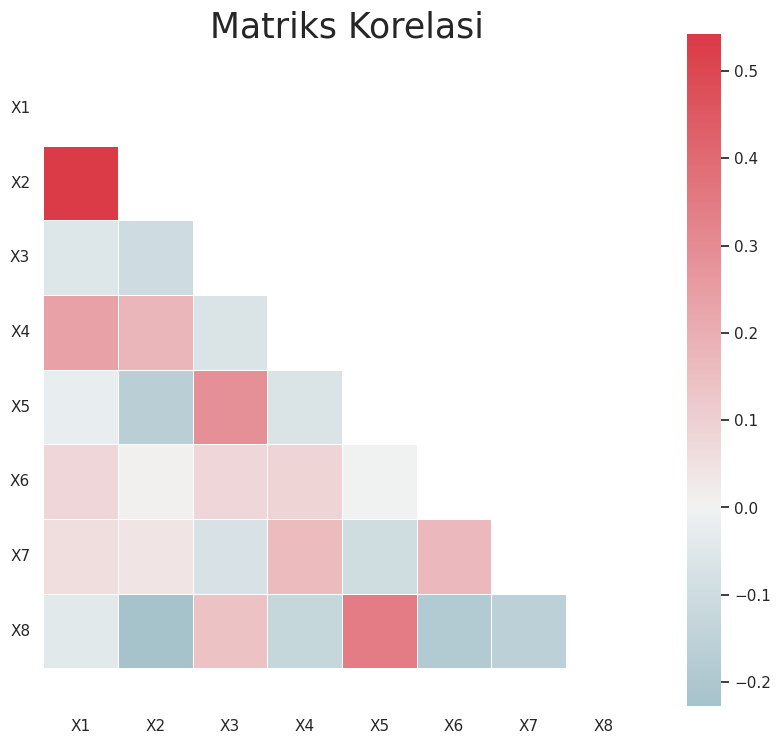

In [17]:
# Visualisasi nilai korelasi
sns.set(style='white')

# Menyembunyikan segitiga atas
mask = np.zeros_like(corr, dtype=np.bool) # Mengembalikan array false dengan bentuk dan tipe yang sama dengan array corr
mask[np.triu_indices_from(mask)] = True # Matriks segitiga atas disembunyikan

# Persiapan matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Menghasilkan peta warna divergen khusus
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Gambar heatmap dengan mask dan aspek rasio yang benar
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Matriks Korelasi', fontsize=25)
plt.yticks(rotation=0)

# Fix a bug
b, t = plt.ylim() # Tentukan space nilai atas dan bawah
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

# **K-Means clustering**

In [18]:
# k-means manual 1 iterasi
# Menggunakan metode inisiasi titik awal yang digunakan pada fungsi kMeans library scikit-learn yaitu kMeans++
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans_plusplus(data, k):
    # Inisialisasi array untuk menyimpan pusat-pusat cluster
    centers = [data[np.random.randint(0, len(data))]]

    for _ in range(1, k):
        # Hitung jarak minimum kuadrat antara setiap data point dan pusat cluster yang sudah ada
        distances = [min([euclidean_distance(center, point) for center in centers])**2 for point in data]
        # Pilih data point berikutnya sebagai pusat cluster baru dengan probabilitas terkait jaraknya
        probabilities = distances / np.sum(distances)
        next_center = data[np.random.choice(np.arange(len(data)), p=probabilities)]
        centers.append(next_center)

    return np.array(centers)

# Input data
selected_data = data[['X1','X2','X3','X4','X5','X6','X7','X8']].values
centroid_awal = []

# Menjalankan algoritma KMeans++ untuk inisialisasi
k = 2  # Jumlah cluster yang diinginkan
initial_centers = kmeans_plusplus(selected_data, k)
pd.DataFrame(initial_centers)

,0,1,2,3,4,5,6,7
0,3.93,14.50,98.02,9.943583,70.58,0.000000,65.644904,89.794015
1,5.99,3.59,99.70,16.562500,95.79,91.916168,59.149536,90.274070


In [19]:
# Hitung jarak antara setiap titik data dan centroid
distances = pairwise_distances(data, initial_centers)
pd.DataFrame(distances)

,0,1
0,20.960676,90.505455
1,29.176097,96.066614
2,44.964023,73.562129
3,81.545189,101.147788
4,45.041169,66.147337
...,...,...
85,33.306337,95.029216
86,26.738122,96.015626
87,30.887945,97.294394
88,34.906376,100.448867


In [20]:
# Keanggotaan awal
labels = np.zeros(distances.shape[0], dtype=int)
for i in range(distances.shape[0]):
    # Temukan indeks centroid dengan jarak terdekat untuk setiap titik data
    labels[i] = np.argmin(distances[i])

pd.DataFrame(labels, index=data.index)

,,0
puskesmas,tahun,
Nglipar I,2020,0
Nglipar II,2020,0
Gedangsari I,2020,0
Gedangsari II,2020,0
Patuk I,2020,0
...,...,...
Karangmojo II,2022,0
Semin I,2022,0
Semin II,2022,0


In [21]:
# Contoh menghitung centroid dari cluster 0
all_data_c0=data[labels == 0]
sum_data_c0=all_data_c0.sum()
# Menghitung rata-rata
centroid_c0=sum_data_c0/len(all_data_c0)
centroid_c0

,0
X1,7.027778
X2,15.930476
X3,86.346984
X4,16.150031
X5,81.742063
X6,7.394741
X7,58.734925
X8,86.252154


In [22]:
# Centroid baru
new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(0,2)])
pd.DataFrame(new_centroids)

,0,1,2,3,4,5,6,7
0,7.027778,15.930476,86.346984,16.150031,81.742063,7.394741,58.734925,86.252154
1,7.691111,16.965556,89.980370,17.020719,82.624444,85.374440,63.853491,84.025881


In [23]:
# Penentuan iterasi lanjut atau tidak
new_centroids==initial_centers

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [24]:
# Menggunakan fungsi kmeans dari library scikit-learn untuk melakukan clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(data)
hasil_kmeans = pd.DataFrame(cluster_labels, index=data.index)
hasil_kmeans

,,0
puskesmas,tahun,
Nglipar I,2020,0
Nglipar II,2020,0
Gedangsari I,2020,0
Gedangsari II,2020,0
Patuk I,2020,0
...,...,...
Karangmojo II,2022,0
Semin I,2022,0
Semin II,2022,0


In [25]:
# Jumlah iterasi
num_iterations = kmeans.n_iter_
num_iterations

4

In [26]:
# Jarak setiap objek ke centroid akhir
distances = pd.DataFrame(kmeans.transform(data))
distances

,0,1
0,14.875148,77.873610
1,18.636057,83.611441
2,35.819931,58.835574
3,76.842817,80.958093
4,31.061181,55.865299
...,...,...
85,17.296007,86.240321
86,17.179565,86.992618
87,17.654125,87.078370
88,27.282269,89.271564


In [27]:
# Centroid akhir
cluster_centers = kmeans.cluster_centers_
pd.DataFrame(cluster_centers)

,0,1,2,3,4,5,6,7
0,7.007742,15.901613,86.406774,16.153071,82.145484,6.726609,58.471176,86.284830
1,7.711786,16.992500,89.718214,16.982891,81.699643,84.068885,64.254700,84.033036


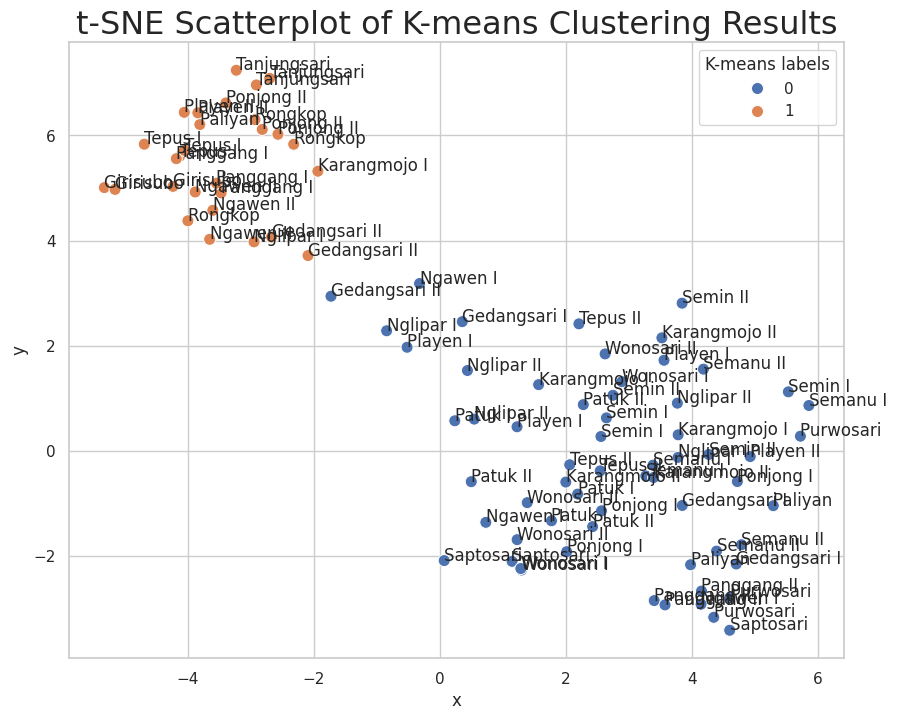

In [28]:
# Menampilkan hasil clustering
# Memanggil k-means
clust_labels_km = cluster_labels
cent_km = cluster_centers

# Menambahkan label cluster ke kerangka data baru
data_kmeans_final = data.copy()
data_kmeans_final['k_means_labels'] = clust_labels_km

# Menerapkan t-SNE
two_dim = TSNE(random_state=0).fit_transform(data_kmeans_final.drop(columns='k_means_labels'))

two_dim_final = pd.DataFrame(two_dim, index=data_kmeans_final.index).merge(data_kmeans_final['k_means_labels'], on=['puskesmas','tahun'])

two_dim_final.columns = ['x', 'y', 'K-means labels']

#

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))

# visualisasi t-SNE
sns.scatterplot(data=two_dim_final, x='x', y='y', hue='K-means labels', s=75, palette='deep')

# Tata letak
plt.title('t-SNE Scatterplot of K-means Clustering Results', size=23)

# Beri label titik data pada plot pencar
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

two_dim_labels = two_dim_final.reset_index()
label_point(two_dim_labels.x, two_dim_labels.y, two_dim_labels.puskesmas, plt.gca())

plt.show()

# **Evaluasi K-Means**

In [29]:
# Silhouette Coefficient untuk 2 cluster dengan perhitungan manual
n = len(data)
silhouette_scores = [] # Menyimpan silhouette scores
a_scores = [] # Menyimpan ai
b_scores = [] # Menyimpan bi
m_scores = [] # Menyimpan max(ai,bi)

# Menghitung matriks jarak antar data
distances = pairwise_distances(data)

# Loop untuk setiap titik data
for i in range(n):
    cluster_label = cluster_labels[i]
    cluster_distances = distances[i][cluster_labels == cluster_label]
    a_i = np.mean(cluster_distances[cluster_distances != 0]) if len(cluster_distances) > 1 else 0

    b_i = np.min([np.mean(distances[i][cluster_labels == j]) for j in set(cluster_labels) if j != cluster_label])

    silhouette_i = (b_i - a_i) / max(a_i, b_i)

    m_scores.append(max(a_i, b_i))
    a_scores.append(a_i)
    b_scores.append(b_i)
    silhouette_scores.append(silhouette_i)

In [30]:
# Nilai ai
pd.DataFrame(a_scores)

,0
0,32.464886
1,34.643179
2,46.340425
3,82.586083
4,42.915679
...,...
85,32.757696
86,33.114172
87,33.769060
88,39.730733


In [31]:
# Nilai bi
pd.DataFrame(b_scores)

,0
0,83.351928
1,88.698640
2,65.890228
3,85.991870
4,63.503215
...,...
85,91.372155
86,92.078991
87,92.112576
88,94.138664


In [32]:
# Nilai max(ai,bi)
pd.DataFrame(m_scores)

,0
0,83.351928
1,88.698640
2,65.890228
3,85.991870
4,63.503215
...,...
85,91.372155
86,92.078991
87,92.112576
88,94.138664


In [33]:
# silhouette scores tiap objek
pd.DataFrame(silhouette_scores)

,0
0,0.610508
1,0.609428
2,0.296703
3,0.039606
4,0.324197
...,...
85,0.641491
86,0.640372
87,0.633394
88,0.577955


In [34]:
# Hitung rata-rata nilai Silhouette Score 2 cluster
silhouette_avg = np.mean(silhouette_scores)
print('Nilai silhouette 2 cluster= ', silhouette_avg)

Nilai silhouette 2 cluster=  0.513705694417657


In [35]:
# Menghitung Calinski-Harabasz Index 2 cluster Manual
# Memakai centroid dari cluster 0
centroids_0 = [np.mean(data[cluster_labels == 0], axis=0)]
centroids_0 = np.array(centroids_0)

In [36]:
# Memakai centroid dari cluster 1
centroids_1 = [np.mean(data[cluster_labels == 1], axis=0)]
centroids_1 = np.array(centroids_1)

In [37]:
# Menghitung centroid global
global_centroid = [np.mean(data, axis=0)]
global_centroid = np.array(global_centroid)
global_centroid

array([[ 7.22677778, 16.241     , 87.437     , 16.41123763, 82.00677778,
        30.78865067, 60.27049469, 85.58427197]])

In [38]:
# Menghitung variansi intra-klaster dan variansi antara-klaster
intra_cluster_variance_0 = np.sum([np.sum((data[cluster_labels == 0] - centroids_0)**2)])
intra_cluster_variance_1 = np.sum([np.sum((data[cluster_labels == 1] - centroids_1)**2)])
inter_cluster_variance_0 = np.sum((centroids_0 - global_centroid)**2) * np.sum(cluster_labels == 0)
inter_cluster_variance_1 = np.sum((centroids_1 - global_centroid)**2) * np.sum(cluster_labels == 1)
print(intra_cluster_variance_0)
print(intra_cluster_variance_1)
print(inter_cluster_variance_0)
print(inter_cluster_variance_1)

58845.85530704149
31251.658872152995
36209.276051463006
80177.68268538231


In [39]:
# Nilai Calinski-Harabasz Index 2 cluster
n = len(data)
k = 2
ch_index = ((inter_cluster_variance_0 + inter_cluster_variance_1)/ (k - 1)) / ((intra_cluster_variance_0 + intra_cluster_variance_1) / (n - k))
print('Nilai CHI 2 cluster= ', ch_index)

Nilai CHI 2 cluster=  113.67741343531434


In [40]:
# Menghitung Davies-Bouldin Index 2 cluster secara manual
k = 2
cluster_centers = [np.mean(data[cluster_labels == i], axis=0) for i in range(k)]

In [41]:
# Jarak antar-centroid
distances = pairwise_distances(cluster_centers, cluster_centers, metric='euclidean')
distances[0, 1]

np.float64(77.6780928552515)

In [42]:
# Nilai delta
delta_k0 = np.mean(pairwise_distances(data[cluster_labels==0], [cluster_centers[0]], metric='euclidean'))
delta_k1 = np.mean(pairwise_distances(data[cluster_labels==1], [cluster_centers[1]], metric='euclidean'))
print(delta_k0)
print(delta_k1)

28.309047423180477
32.13231828582284


In [43]:
# Nilai Davies-Bouldin Index 2 cluster secara manual
db_index = np.max([(delta_k0 + delta_k1) / distances[0, 1]])
print('Nilai DBI 2 cluster= ', db_index)

Nilai DBI 2 cluster=  0.7781005362944763


In [44]:
# Menghitung Dunn Index 2 cluster secara manual
# Jarak terjauh antarobjek di cluster 0
intra_cluster_0_distance = pairwise_distances(data[cluster_labels==0])
max_intra_cluster_0_distance = np.max(intra_cluster_0_distance)
max_intra_cluster_0_distance

np.float64(119.93612394959715)

In [45]:
# Jarak terjauh antarobjek di cluster 1
intra_cluster_1_distance = pairwise_distances(data[cluster_labels==1])
max_intra_cluster_1_distance = np.max(intra_cluster_1_distance)
max_intra_cluster_1_distance

np.float64(86.16881288117581)

In [46]:
# Jarak tejauh antarobjek dalam suatu cluster
max_intra_cluster_distance = max(max_intra_cluster_0_distance, max_intra_cluster_1_distance)
max_intra_cluster_distance

np.float64(119.93612394959715)

In [47]:
# Jarak terdekat objek antarcluster
inter_cluster_distance = pairwise_distances(data[cluster_labels==0], data[cluster_labels==1])
min_inter_cluster_distance = np.min(inter_cluster_distance)
min_inter_cluster_distance

np.float64(28.92953470450301)

In [48]:
# Nilai dunn Dunn Index 2 cluster secara manual
dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
print('Nilai DI 2 cluster= ', dunn_index_value)

Nilai DI 2 cluster=  0.24120785091121147


In [49]:
# Shilhouette Coefficient berbagai cluster menggunakan library scikit-learn
for i in range (2,6):
        clusters = KMeans(n_clusters=i, random_state=0)
        clusters.fit(data)
        sc_score =silhouette_score(data, clusters.labels_ )
        print('Cluster =', i , 'Memiliki silhouette coefficient ', sc_score)

Cluster = 2 Memiliki silhouette coefficient  0.5125933959253746
Cluster = 3 Memiliki silhouette coefficient  0.36664551666458306
Cluster = 4 Memiliki silhouette coefficient  0.21075859600390667
Cluster = 5 Memiliki silhouette coefficient  0.2142624733682799


In [50]:
# Calinski-Harabasz Index berbagai cluster menggunakan library scikit-learn
for i in range (2,6):
        clusters = KMeans(n_clusters=i, random_state=0)
        clusters.fit(data)
        chi_score =calinski_harabasz_score(data, clusters.labels_ )
        print('Cluster =', i , 'Memiliki Calinski-Harabasz Index', chi_score)

Cluster = 2 Memiliki Calinski-Harabasz Index 113.67741343531439
Cluster = 3 Memiliki Calinski-Harabasz Index 71.85793820164527
Cluster = 4 Memiliki Calinski-Harabasz Index 56.91745706178539
Cluster = 5 Memiliki Calinski-Harabasz Index 52.55920156194826


In [51]:
# Davies-Bouldin Index berbagai cluster menggunakan library scikit-learn
for i in range (2,6):
        clusters = KMeans(n_clusters=i, random_state=0)
        clusters.fit(data)
        dbi_score =davies_bouldin_score(data, clusters.labels_ )
        print('Cluster =', i , 'Memiliki Davies-Bouldin Index', dbi_score)

Cluster = 2 Memiliki Davies-Bouldin Index 0.7781005362944748
Cluster = 3 Memiliki Davies-Bouldin Index 1.181390726284487
Cluster = 4 Memiliki Davies-Bouldin Index 1.5520960212668733
Cluster = 5 Memiliki Davies-Bouldin Index 1.480190957861638


In [52]:
# Dunn Index berbagai cluster
def dunn_index(data, labels):
    k = len(np.unique(labels))  # Jumlah klaster
    cluster_distances = []  # Menyimpan jarak antara klaster

    # Loop untuk menghitung jarak antar klaster
    for i in range(k):
        for j in range(k):
            if j != i:
                # Menghitung jarak antara dua klaster
                distance = np.min(pairwise_distances(data[cluster_labels==i], data[cluster_labels==j]))
                cluster_distances.append(distance)

    # Menghitung jarak terdekat antara dua klaster
    min_inter_cluster_distance = np.min(cluster_distances)

    # Menghitung jarak terjauh di dalam klaster
    max_intra_cluster_distance = 0.0
    for l in range(k):
        intra_distances = pairwise_distances(data[labels==l])
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))

    # Menghitung Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

# Untuk menampung nilai indeks dunn
dunn_indices = []

# Menentukan range jumlah cluster yang akan dites
k_range = range(2, 6)

# Menghitung untuk beberapa nilai jumlah cluster
for m in k_range:
    kmeans = KMeans(n_clusters=m, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    c_dunn_index = dunn_index(data, cluster_labels)
    dunn_indices.append(c_dunn_index)

# Output
for m, dunn in zip(k_range, dunn_indices):
    print('Cluster =', m , 'Memiliki Dunn Index', dunn)

Cluster = 2 Memiliki Dunn Index 0.24120785091121147
Cluster = 3 Memiliki Dunn Index 0.2505486821662681
Cluster = 4 Memiliki Dunn Index 0.15466325613917378
Cluster = 5 Memiliki Dunn Index 0.18534525150710837


# **Fuzzy C-Means**

In [53]:
# Menghitung 1 iterasi FCM 2 cluster manual (memanfaatkan inisiasi u0 dari fungsi fuzz.cluster.cmeans library SciPy)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, c=2, m=2, error=0.005, maxiter=1000) # Fungsi ini akan digunakan untuk proses selanjutnya

# Membership awal
membership = u0
pd.DataFrame(membership.T)

,0,1
0,0.668274,0.331726
1,0.618546,0.381454
2,0.524753,0.475247
3,0.243842,0.756158
4,0.772746,0.227254
...,...,...
85,0.108757,0.891243
86,0.346814,0.653186
87,0.600507,0.399493
88,0.437825,0.562175


In [54]:
# Menentukan centroid awal
# Pangkat
m=2

# Membuat list untuk centroids
centroids = [0,1]

centroids[0] = np.dot(membership[0].T ** m, data) / np.sum(membership[0].T ** m, keepdims=True)
centroids[1] = np.dot(membership[1].T ** m, data) / np.sum(membership[1].T ** m, keepdims=True)
centroids = np.array(centroids)
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7
0,7.061050,16.768661,88.936574,15.909852,82.372619,33.368641,59.967623,85.382561
1,7.379834,15.736508,86.784718,16.987352,82.617188,26.094891,61.088152,86.363559


In [55]:
pd.DataFrame(np.dot(membership[0].T ** m, data))

,0
0,181.826847
1,431.804466
2,2290.177450
3,409.689549
4,2121.151151
5,859.265265
6,1544.207219
7,2198.659214


In [56]:
np.sum(membership[0].T ** m, keepdims=True)

array([25.7506823])

In [57]:
pd.DataFrame(np.dot(membership[1].T ** m, data))

,0
0,208.652495
1,444.923492
2,2453.693060
3,480.289020
4,2335.863119
5,737.789495
6,1727.165557
7,2441.785509


In [58]:
np.sum(membership[1].T ** m, keepdims=True)

array([28.27333108])

In [59]:
# Jarak setiap titik pada centroid awal
distances = pairwise_distances(data, centroids)
pd.DataFrame(distances)

,0,1
0,29.699359,23.283480
1,36.369416,29.126865
2,26.229705,25.593858
3,70.405224,69.914947
4,18.635999,20.256729
...,...,...
85,37.328848,30.805588
86,37.975582,31.867031
87,38.473944,31.890854
88,44.199494,37.300354


In [60]:
#perkalian derajat keanggotaan dan jarak
pd.DataFrame((membership.T**2) * distances**2)

,0,1
0,393.915774,59.656065
1,506.077712,123.444279
2,189.450842,147.948445
3,294.732737,2794.889579
4,207.385906,21.191442
...,...,...
85,16.481770,753.791526
86,173.460872,433.268652
87,533.788197,162.312344
88,374.486058,439.712700


In [61]:
# Fungsi objektif awal
objective_function = np.sum((membership.T**2) * distances**2)
objective_function

np.float64(120044.04480660445)

In [62]:
# Menentukan derajat keanggotaan baru
membership_new = 1 / distances**(2/(2-1))
pd.DataFrame(membership_new)

,0,1
0,0.001134,0.001845
1,0.000756,0.001179
2,0.001453,0.001527
3,0.000202,0.000205
4,0.002879,0.002437
...,...,...
85,0.000718,0.001054
86,0.000693,0.000985
87,0.000676,0.000983
88,0.000512,0.000719


In [63]:
#agar total derajat keanggotaan = 1
pd.DataFrame(np.sum(membership_new, axis=1, keepdims=True))

,0
0,0.002978
1,0.001935
2,0.002980
3,0.000406
4,0.005316
...,...
85,0.001771
86,0.001678
87,0.001659
88,0.001231


In [64]:
# NIlai membership baru
membership_new = membership_new / np.sum(membership_new, axis=1, keepdims=True)
pd.DataFrame(membership_new)

,0,1
0,0.380656,0.619344
1,0.390756,0.609244
2,0.487732,0.512268
3,0.496506,0.503494
4,0.541600,0.458400
...,...,...
85,0.405129,0.594871
86,0.413202,0.586798
87,0.407255,0.592745
88,0.415950,0.584050


In [65]:
# Centroid baru
membership_new = membership_new.T
centroids_new = [0,1]
m=2

centroids_new[0] = np.dot(membership_new[0] ** m, data) / np.sum(membership_new[0] ** m, keepdims=True)
centroids_new[1] = np.dot(membership_new[1] ** m, data) / np.sum(membership_new[1] **m, keepdims=True)
centroids_new = np.array(centroids_new)
pd.DataFrame(centroids_new)

,0,1,2,3,4,5,6,7
0,7.30923,16.302635,87.638807,16.472961,81.705060,39.479306,60.587790,85.246611
1,7.15104,16.218404,87.279383,16.360835,82.296618,23.390307,60.001172,85.892803


In [66]:
# Jarak setiap titik pada centroid baru
distances_new = pairwise_distances(data, centroids_new)
pd.DataFrame(distances_new)

,0,1
0,35.036300,21.336929
1,41.098819,27.521629
2,27.346310,26.799975
3,68.464755,71.030793
4,19.758682,20.530904
...,...,...
85,43.009764,28.547314
86,43.455650,29.217607
87,43.651940,29.475546
88,48.165410,35.937148


In [67]:
#perkalian derajat keanggotaan dan jarak
pd.DataFrame((membership_new.T**2) * distances_new**2)

,0,1
0,177.870083,174.633287
1,257.911398,281.145051
2,177.893728,188.478838
3,1155.535279,1279.033230
4,114.517690,88.573982
...,...,...
85,303.612723,288.387643
86,322.417023,293.945011
87,316.038755,305.252513
88,401.377507,440.541767


In [68]:
# Fungsi objektif baru
objective_function_new = np.sum((membership_new.T**2) * distances_new**2)
objective_function_new

np.float64(101621.55611507848)

In [69]:
abs(objective_function_new - objective_function) < 0.005

np.False_

In [70]:
# Menggunakan FCM untuk melakukan clustering (melanjutkan fungsi yang sudah dipakai di bagian awal FCM)
# Membership akhir
membership = u.T
pd.DataFrame(membership)

,0,1
0,0.041748,0.958252
1,0.057535,0.942465
2,0.298458,0.701542
3,0.497221,0.502779
4,0.258081,0.741919
...,...,...
85,0.036776,0.963224
86,0.038465,0.961535
87,0.043813,0.956187
88,0.098298,0.901702


In [71]:
# Penentuan anggota cluster
cluster_membership = np.argmax(u, axis=0)
hasil_fcm = pd.DataFrame(cluster_membership, index=data.index)
hasil_fcm

,,0
puskesmas,tahun,
Nglipar I,2020,1
Nglipar II,2020,1
Gedangsari I,2020,1
Gedangsari II,2020,1
Patuk I,2020,1
...,...,...
Karangmojo II,2022,1
Semin I,2022,1
Semin II,2022,1


In [72]:
# Centroid akhir
center = pd.DataFrame(cntr.T)
center

,0,1
0,7.576367,7.017063
1,16.493546,16.290921
2,89.235826,87.707482
3,17.076070,16.075269
4,82.066030,82.888171
5,81.234627,6.025382
6,65.008835,57.714926
7,84.076202,86.571515


In [73]:
# Jarak setiap titik pada centroid akhir
jarak=pd.DataFrame(d.T)
jarak

,0,1
0,75.030494,15.660867
1,80.689892,19.936611
2,56.085676,36.581943
3,79.105048,78.666649
4,53.516749,31.563803
...,...,...
85,83.530184,16.321513
86,84.361120,16.873108
87,84.362517,18.058344
88,86.451320,28.543873


In [74]:
# Fungsi objektif awal sampai akhir
f_tujuan=pd.DataFrame(jm.T)
f_tujuan

,0
0,120044.044807
1,101621.556115
2,95768.092700
3,82036.462784
4,73803.332636
5,72768.501310
6,72693.795649
7,72687.760863
8,72687.243542


In [75]:
print('banyak iterasi: ', p)

banyak iterasi:  9


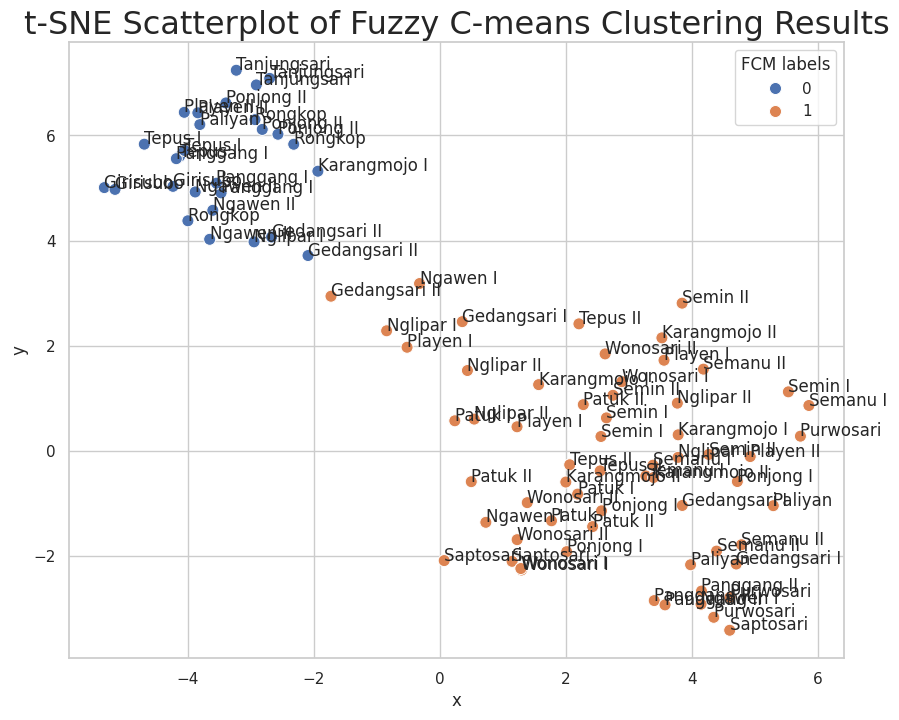

In [76]:
# Menampilkan hasil clustering
clust_labels_fcm = cluster_membership
cent_fcm = center

# Menambahkan label cluster ke kerangka data baru
data_fcm_final = data.copy()
data_fcm_final['fcm_labels'] = clust_labels_fcm

# Menerapkan t-SNE
two_dim = TSNE(random_state=0).fit_transform(data_fcm_final.drop(columns='fcm_labels'))

two_dim_final = pd.DataFrame(two_dim, index=data_fcm_final.index).merge(data_fcm_final['fcm_labels'], on=['puskesmas','tahun'])

two_dim_final.columns = ['x', 'y', 'FCM labels']

#

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8))

# visualisasi t-SNE
sns.scatterplot(data=two_dim_final, x='x', y='y', hue='FCM labels', s=75, palette='deep')

# Tata letak
plt.title('t-SNE Scatterplot of Fuzzy C-means Clustering Results', size=23)

# Beri label titik data pada plot pencar
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

two_dim_labels = two_dim_final.reset_index()
label_point(two_dim_labels.x, two_dim_labels.y, two_dim_labels.puskesmas, plt.gca())

plt.show()

# **Evaluasi Fuzzy C-Means**

In [77]:
# Skor Shilhouette
for i in range (2,6):
        # Memasukkan data ke dalam model FCM
        num_clusters = i
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, num_clusters, 2, error=0.005, maxiter=1000)
        # Mendapatkan label kluster dari tingkat keanggotaan
        cluster_membership = np.argmax(u, axis=0)
        sc_score =silhouette_score(data, cluster_membership)
        print('Cluster =', i , 'Memiliki silhouette coefficient ', sc_score)

Cluster = 2 Memiliki silhouette coefficient  0.5125933959253746
Cluster = 3 Memiliki silhouette coefficient  0.257471994797902
Cluster = 4 Memiliki silhouette coefficient  0.20626125564795295
Cluster = 5 Memiliki silhouette coefficient  0.2074034946649699


In [78]:
# Calinski-Harabasz Index
for i in range (2,6):
        # Memasukkan data ke dalam model FCM
        num_clusters = i
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, num_clusters, 2, error=0.005, maxiter=1000)
        # Mendapatkan label kluster dari tingkat keanggotaan
        cluster_membership = np.argmax(u, axis=0)
        chi_score =calinski_harabasz_score(data, cluster_membership)
        print('Cluster =', i , 'Memiliki Calinski-Harabasz Index', chi_score)

Cluster = 2 Memiliki Calinski-Harabasz Index 113.67741343531439
Cluster = 3 Memiliki Calinski-Harabasz Index 69.4274455436701
Cluster = 4 Memiliki Calinski-Harabasz Index 57.78379476962313
Cluster = 5 Memiliki Calinski-Harabasz Index 50.325746330657466


In [79]:
# Davies-Bouldin Index
for i in range (2,6):
        # Memasukkan data ke dalam model FCM
        num_clusters = i
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, num_clusters, 2, error=0.005, maxiter=1000)
        # Mendapatkan label kluster dari tingkat keanggotaan
        cluster_membership = np.argmax(u, axis=0)
        dbi_score =davies_bouldin_score(data, cluster_membership )
        print('Cluster =', i , 'Memiliki Davies-Bouldin Index', dbi_score)

Cluster = 2 Memiliki Davies-Bouldin Index 0.7781005362944748
Cluster = 3 Memiliki Davies-Bouldin Index 1.5539594346384453
Cluster = 4 Memiliki Davies-Bouldin Index 1.6006747620139843
Cluster = 5 Memiliki Davies-Bouldin Index 1.5912391409525182


In [80]:
# Dunn Index berbagai cluster
def dunn_index(data, labels):
    k = len(np.unique(labels))  # Jumlah klaster
    cluster_distances = []  # Menyimpan jarak antara klaster

    # Loop untuk menghitung jarak antar klaster
    for i in range(k):
        for j in range(k):
            if j != i:
                # Menghitung jarak antara dua klaster
                distance = np.min(pairwise_distances(data[cluster_labels==i], data[cluster_labels==j]))
                cluster_distances.append(distance)

    # Menghitung jarak terdekat antara dua klaster
    min_inter_cluster_distance = np.min(cluster_distances)

    # Menghitung jarak terjauh di dalam klaster
    max_intra_cluster_distance = 0.0
    for l in range(k):
        intra_distances = pairwise_distances(data[labels==l])
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))

    # Menghitung Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

# Untuk menampung nilai indeks dunn
dunn_indices = []

# Menentukan range jumlah cluster yang akan dites
cluster_range = range(2, 6)

# Menghitung untuk beberapa nilai jumlah cluster
for n_clusters in cluster_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, n_clusters, m=2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)
    c_dunn_index = dunn_index(data, labels)
    dunn_indices.append(c_dunn_index)

# Output
for n_clusters, dunn in zip(cluster_range, dunn_indices):
    print('Cluster =', n_clusters , 'Memiliki Dunn Index', dunn)

Cluster = 2 Memiliki Dunn Index 0.24120785091121147
Cluster = 3 Memiliki Dunn Index 0.20930340892833027
Cluster = 4 Memiliki Dunn Index 0.13758695654497669
Cluster = 5 Memiliki Dunn Index 0.16103761922617216
